# About Dataset

1. `id`: A unique identifier for each track.
2. `name`: The name of the track.
3. `album`: The name of the album to which the track belongs.
4. `album_id`: An identifier for the album.
5. `artists`: The name of the artist(s) who performed the track.
6. `artist_ids`: Identifier(s) for the artist(s).
7. `track_number`: The position of the track within the album.
8. `disc_number`: The disc number (if it's a multi-disc album).
9. `explicit`: A boolean indicating whether the track contains explicit content.
10. `danceability`: A measure of how suitable the track is for dancing.
11. `energy`: Represents the energy of the track.
12. `key`: The key of the track.
13. `loudness`: Loudness of the track in decibels (dB).
14. `mode`: Whether the track is in major mode (1) or minor mode (0).
15. `speechiness`: A measure of the presence of spoken words or speech in the track.
16. `acousticness`: Represents the amount of acoustic sound in the track.
17. `instrumentalness`: A measure of how instrumental the track is.
18. `liveness`: A measure of the presence of a live audience in the track.
19. `valence`: Indicates the positivity of the track.
20. `tempo`: The tempo of the track in beats per minute (BPM).
21. `duration_ms`: The duration of the track in milliseconds.
22. `time_signature`: The time signature of the track.
23. `year`: The year in which the track was released.
24. `release_date`: The release date of the track.

# Importing Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

# Basic EDA

In [2]:
df = pd.read_csv('../dataset/tracks_features.csv')

In [3]:
df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [4]:
df.shape

(1204025, 24)

In [5]:
df['year'].min()

0

## Keeping Songs Released After 2015

In [6]:
df = df[df['year'] > 2009]

In [7]:
df.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567815 entries, 22 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                567815 non-null  object 
 1   name              567814 non-null  object 
 2   album             567804 non-null  object 
 3   album_id          567815 non-null  object 
 4   artists           567815 non-null  object 
 5   artist_ids        567815 non-null  object 
 6   track_number      567815 non-null  int64  
 7   disc_number       567815 non-null  int64  
 8   explicit          567815 non-null  bool   
 9   danceability      567815 non-null  float64
 10  energy            567815 non-null  float64
 11  key               567815 non-null  int64  
 12  loudness          567815 non-null  float64
 13  mode              567815 non-null  int64  
 14  speechiness       567815 non-null  float64
 15  acousticness      567815 non-null  float64
 16  instrumentalness  56781

In [9]:
def basic_features(data):
    print("Column Name", "Number of Unique Features")
    for col in df.columns:
        print(col, "   " ,data[col].nunique())
        if df[col].value_counts().count() < 15:
            print(df[col].value_counts(dropna=False))
        else:
            pass

basic_features(df)

Column Name Number of Unique Features
id     567815
name     426778
album     62624
album_id     69330
artists     97809
artist_ids     98306
track_number     50
disc_number     13
disc_number
1     545553
2      17464
3       3262
4        958
5        365
6         95
7         48
8         28
11        15
10        12
9         11
12         3
13         1
Name: count, dtype: int64
explicit     2
explicit
False    505580
True      62235
Name: count, dtype: int64
danceability     1343
energy     3093
key     12
key
7     69711
0     69278
2     65589
9     60951
1     50905
5     46067
4     45011
11    40629
10    36350
8     32859
6     32567
3     17898
Name: count, dtype: int64
loudness     35202
mode     2
mode
1    365579
0    202236
Name: count, dtype: int64
speechiness     1650
acousticness     5397
instrumentalness     5402
liveness     1770
valence     1814
tempo     119514
duration_ms     187681
time_signature     5
time_signature
4.0    474120
3.0     69809
5.0     14355


In [10]:
df.sample(10)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
370074,7I5IZB99oBCGK5ccEoPd4d,Crystalize,With High Regards,47sbR33AlnKjLSLmFwVAfy,['Cripple And Casino'],['0CxZ2bAjYrvgnaVkoL9xiR'],10,1,False,0.4700,...,0.0369,0.000109,0.049200,0.1390,0.3870,124.733,261335,4.0,2013,2013-02-12
297584,6J91ZwxS60P6rcx3A1Aj9T,Price of Love,Beach Town Confidential: Live at the Golden Be...,1jiVkDyTGErjrNtFYHVlvV,['The Plimsouls'],['7BnikuGfXRWkGLJCWS1y9P'],16,1,False,0.4660,...,0.0551,0.200000,0.000166,0.9530,0.5860,135.730,143293,4.0,2012,2012-02-07
920182,2MC3ygtk8g2oLMk2yBgwsC,"Bilocation, Pt. 2",Billow Observatory,05qyYXMh20hW5Wp9n0tYxV,['Billow Observatory'],['2LylAbvBw2df3S9oO62du5'],14,1,False,0.0759,...,0.0438,0.933000,0.935000,0.0799,0.0332,78.398,445638,4.0,2012,2012-12-04
535481,6xganxIDdlcKVWK7rRIc2v,"Main Title Song (From ""Qiu Jin: Qiu Jin: A Wom...",12 Heroines of Imperial China,4ZMUthh7q0A106tSlDnRWp,"['Anonymous', 'Joseph Ka Fai Koo', 'Hong Kong ...","['4kCZ5nyurc9eIqLJfUcW0Y', '3fkOKQa9OV579sIXQW...",12,1,False,0.1560,...,0.0376,0.934000,0.913000,0.1150,0.0621,70.596,304427,4.0,2015,2015-11-06
1146477,0mWZBrI0nwFjUUDlGoVxaT,No More Heroes,No More Heroes,7zf9cv2zH1MSMzvuOp06Mi,"['Die Krupps', 'Ross The Boss']","['0iDagYU2nu7gTWMdtCxzxW', '7iOaIkOG63D70TyWiq...",1,1,False,0.4020,...,0.1820,0.000888,0.335000,0.3440,0.0894,155.978,212500,4.0,2020,2020-08-05
956677,3lPbFUtFlhEQOZmoMQyHc5,Dreams Presage,Silhouette Moon,38UmXzJwJRU0BEckJqipNN,['Vienna Circle'],['3b9c8xiIvGmkdLoyNiUEEy'],3,1,True,0.2000,...,0.0319,0.199000,0.063400,0.0603,0.1750,73.458,807723,4.0,2013,2013-04-22
1182197,3zfzEikFFpcFXw8dNeApGw,Easy Pass,Boom Bap Vol 9-Lo Fi Heat,5Tm8q1HoiEogkxVeXNAoA8,['Dj Iceman'],['7sTdTPRRgmhFW6Q0Xy4Uzk'],1,1,False,0.7370,...,0.0834,0.136000,0.964000,0.0866,0.8260,170.042,180611,4.0,2020,2020-04-15
646570,2g7Yjfj4mQy5hXT192Or58,Cave Canem,Dr Hypenstein,1YVisujm1TssXD7TZCTT0P,"[""Redtenbacher's Funkestra""]",['1oYScdotTIXO74h10l8ISA'],6,1,False,0.7700,...,0.0399,0.022700,0.889000,0.0688,0.8830,130.011,204153,4.0,2015,2015-01-27
993631,7bY1YVTyZlXqX6Cu6p81tc,Bigger Boat (feat. Randy Newman),Your Life is a Record,027y46STDxTFM35diEeoxy,"['Brandy Clark', 'Randy Newman']","['5vMAKlvvMNSRQRYCAvpG6S', '3HQyFCFFfJO3KKBlUf...",7,1,False,0.7060,...,0.0334,0.247000,0.028600,0.1080,0.7480,123.015,214093,4.0,2020,2020-03-06
944394,0mNrrbFDOc7bVPt53UYkVj,Hidden Path,Plague,6eeMjTE6KrelgiFAp2SKvQ,['Nebula Orionis'],['59eckCEN32YKqbmOsDVUoM'],6,1,False,0.2140,...,0.2650,0.008090,0.983000,0.3780,0.0595,119.994,316500,4.0,2019,2019-11-01


## Removing The Remix Versions & Live versions

In [11]:
df['name'] = df['name'].astype(str)
df = df[~df['name'].str.contains('live', case=False)]
df = df[~df['name'].str.contains('remix', case=False)]
df = df[~df['name'].str.contains('mix', case=False)]
df.shape

(533005, 24)

### Some songs are same just the year is different, Those needs to be removed.

In [12]:
df = df[~df.iloc[:,8:21].duplicated()]

In [13]:
df.sample(10)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
885584,7pCm1Ybm3U7Z66dnb2e0hv,Where They Hide,Blinded,2XryDfKy4SZqNEJoa49PXZ,['Madtown'],['3RBL0zLXPVLRJLd25EUk4m'],4,1,True,0.3250,...,0.2130,0.000298,0.004720,0.6990,0.1780,107.069,220735,3.0,2016,2016-09-12
983627,54U2bROGp6SFMSUFALqjll,Point of View,Hard as a Rock,43CdrSnbXQniYE7Nl4crEr,['D-A-D'],['2I6gQ8HicF6er2NgjfkwGd'],43,1,False,0.4520,...,0.0380,0.019500,0.000006,0.0517,0.5700,139.411,239093,4.0,2019,2019-11-22
143433,2GTCyjTmQ5FXLYclBAMVYL,Vision of Mind,Lost and Found,3Lj2EYfXxoi5rYT33EQd28,['trance[]control'],['66NDcCxdhK8gpyR00Xbp4w'],4,1,False,0.5250,...,0.0573,0.001340,0.838000,0.6880,0.5020,140.042,306000,4.0,2012,2012-04-09
1066010,4Y3WF8Bt8XHn46EIVzJGZk,Of Death,Of Death,133gupWuECTq97JnjrlUUq,['Nautilus'],['1y2PhKY08oLmBpWJpbuzxk'],1,1,False,0.1300,...,0.2220,0.000510,0.332000,0.2190,0.0660,85.493,335493,4.0,2019,2019-01-21
944689,4qyfz6yK1wXO8MquIsdlle,Rites (feat. Sage Sansone),Black November (Music from the Motion Picture),2pST37NQOIdRVFdvQjVaUE,"['Joel Christian Goffin', 'Sage Sansone']","['658h552Ad4Rs9s9jwcWVuF', '09Qy6dBdDSCtbpcogX...",26,1,False,0.1190,...,0.0478,0.706000,0.762000,0.1090,0.0392,78.734,173500,1.0,2015,2015-02-25
883388,1a9IMipJh7jw3hg83ygwEC,The Shapes of Wrath,Big Weather,4p4tukMCH0ohnyLsRPqCBI,"['1,2,3']",['0UQmEB9b87X2Bz0tAjG6II'],8,1,False,0.5310,...,0.0359,0.668000,0.383000,0.4900,0.4940,118.770,430020,4.0,2014,2014-05-27
553154,5oDfEubUyKk21QfcjhuC6p,"Suite Americaine (Americká Suita), Op. 15: IV....",Dancing,0MKyAnFzllBI2gtgOLxByJ,"['Emil František Burian', 'Ebony Band', 'Werne...","['6fAkE21SfA9R5oCAR146sO', '00j1q2Boo42LLtbTtT...",10,1,False,0.2930,...,0.0369,0.943000,0.950000,0.1440,0.1640,109.176,161120,4.0,2011,2011-11-01
1189926,43Iw7GjiMqnOSDLgQBdC4m,BABY FAT/ WROTEN/ STALLING FOR TIME TRANSITION,THE PANDEMIC EXPERIENCE | LIVE GLOBAL BROADCAST,7q0Tnfrgm5TBM0HxGe26mE,['Tobe Nwigwe'],['3Qh89pgJeZq6d8uM1bTot3'],14,1,False,0.6720,...,0.9380,0.269000,0.000000,0.2700,0.3250,123.964,219080,3.0,2020,2020-11-08
1010550,2SQrMnP0dyDnkTMiDASxZl,Laugh Like That,Heaven Is for Real (Original Motion Picture Sc...,1DpJOBq2M49BXeswKSubqP,['Nick Glennie-Smith'],['0cM9EbovGFwSQlWjgHmdGd'],13,1,False,0.0936,...,0.0402,0.462000,0.849000,0.1150,0.0394,176.937,43947,3.0,2014,2014-08-04
876247,0qBSo7EhmKAhJKXleaX7V7,Lay,Black Holes,6ESjsIQSb9iKqCkDo3S2sc,['The Blue Stones'],['5VPCIIfZPK8KPsgz4jmOEC'],6,1,False,0.4870,...,0.0302,0.073800,0.002030,0.1320,0.2080,135.945,208133,3.0,2018,2018-10-26


# Univariate Analysis

In [14]:
df.head(1)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
22,2SwgVZn9S4NGueAaEAryf1,Man on a Mission,Do It for Love,4evw6IBex3N8x1oA2axMTH,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,1,False,0.787,...,0.0315,0.292,0.000025,0.101,0.962,119.946,224307,4.0,2018,2018-04-10


## Changing Explicit True/False -> 0/1

In [15]:
df['explicit'] = df['explicit'].apply(lambda x: 1 if (x == False) else 0)
df['explicit'].value_counts()

explicit
1    461010
0     58807
Name: count, dtype: int64

## Changing Duration ms->minute

In [16]:
def convert_ms(col):
    col = (col / 1000 / 60)
    col = round(col,2)
    return col

df['duration_mins'] = df['duration_ms'].apply(convert_ms)
df.drop(columns=['duration_ms'], inplace=True)

# Feature Selection

In [17]:
df.drop(columns=['album_id','track_number','disc_number','release_date','duration_mins'], inplace=True)
df.drop(columns=['time_signature'], inplace=True)

In [18]:
df.head(5)

,id,name,album,artists,artist_ids,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
22,2SwgVZn9S4NGueAaEAryf1,Man on a Mission,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.787,0.903,0,-4.894,1,0.0315,0.2920,0.000025,0.1010,0.962,119.946,2018
23,0QCQ1Isa0YPVyIbs6JwpO1,Do It for Love,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.587,0.958,4,-5.149,1,0.0586,0.1070,0.000000,0.0574,0.832,87.976,2018
24,3kIBEFhsZOeeKGebxRraOb,Someday We'll Know,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.565,0.781,1,-5.073,0,0.0308,0.0233,0.000010,0.0819,0.461,109.977,2018
25,5dNDRw6qjDcnbW3luRhElU,Forever for You,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.651,0.567,9,-6.417,1,0.0240,0.5620,0.000006,0.1860,0.370,97.030,2018
26,561UU4MvlsCenN1x7leYCh,Life's Too Short,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.833,0.805,0,-4.554,1,0.0347,0.0760,0.013600,0.0731,0.974,116.013,2018


In [19]:
df.columns

Index(['id', 'name', 'album', 'artists', 'artist_ids', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'year'],
      dtype='object')

In [20]:
df.describe().style.background_gradient()

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
count,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000
mean,0.886870,0.501680,0.537627,5.185554,-10.899453,0.645787,0.089892,0.405209,0.286929,0.188388,0.408266,118.564398,2015.382533
std,0.316752,0.191640,0.286772,3.554324,6.653875,0.478275,0.117642,0.378121,0.378743,0.156200,0.264142,30.996220,3.253096
min,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
25%,1.000000,0.366000,0.301000,2.000000,-13.625000,0.000000,0.035400,0.025300,0.000005,0.097400,0.179000,94.888000,2013.000000
50%,1.000000,0.511000,0.563000,5.000000,-8.885000,1.000000,0.045700,0.290000,0.008140,0.123000,0.380000,118.319000,2016.000000
75%,1.000000,0.643000,0.784000,8.000000,-6.246000,1.000000,0.080700,0.809000,0.734000,0.228000,0.612000,138.943000,2018.000000
max,1.000000,1.000000,1.000000,11.000000,7.234000,1.000000,0.968000,0.996000,1.000000,1.000000,1.000000,248.934000,2020.000000


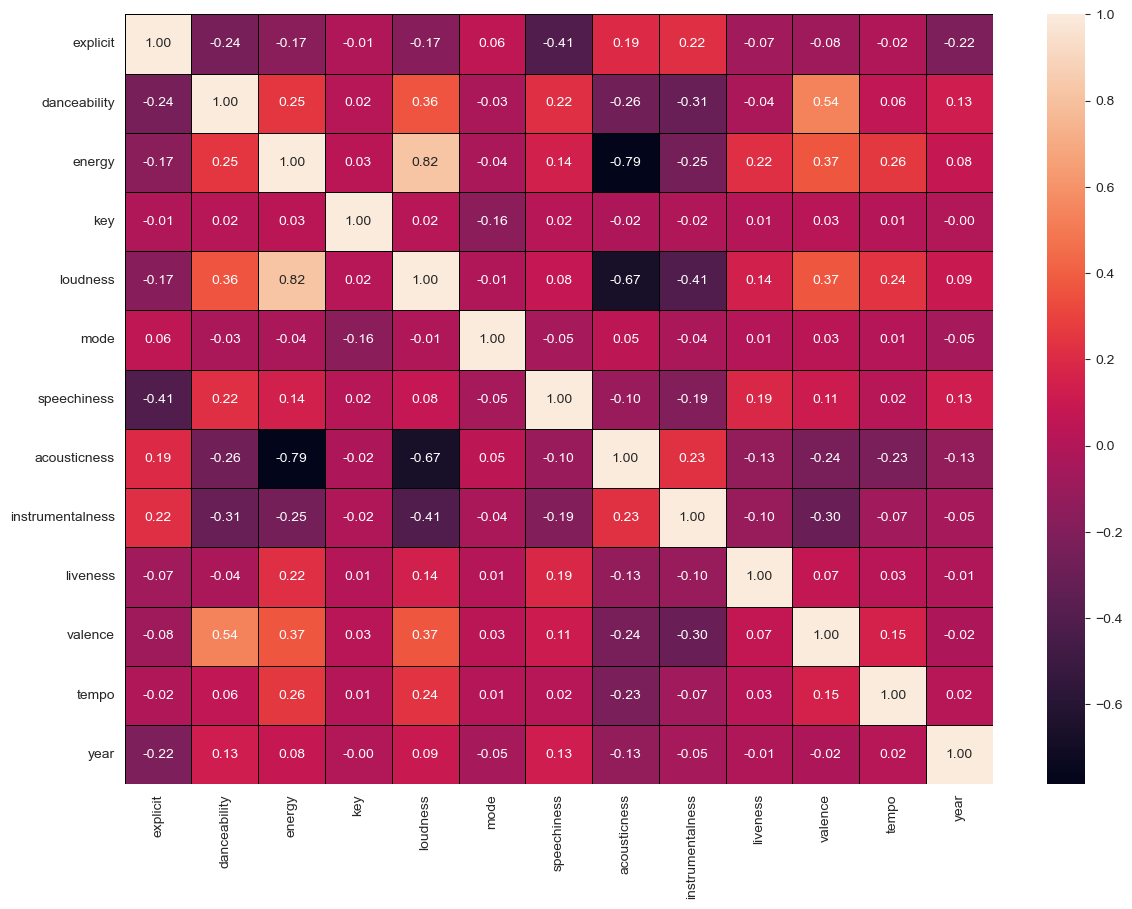

In [21]:
plt.figure(figsize=(14,10))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, fmt='.2f', linewidths=0.5, linecolor='Black')
plt.show()

# Normalizing The Data

In [22]:
df.dtypes

id                   object
name                 object
album                object
artists              object
artist_ids           object
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
year                  int64
dtype: object

In [23]:
def normalize_col(col):
    max_c = df[col].max()
    min_c = df[col].min()
    df[col] = (df[col] - min_c)/(max_c - min_c)

columns = ['explicit','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for col in columns:
    normalize_col(col)

## lowering Names First Letter

In [24]:
df['name'] = df['name'].apply(lambda x:x.lower())

In [25]:
df[df['name'].str.contains('hello', case=False)]

,id,name,album,artists,artist_ids,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
3149,6lELGUBWQ7MxU94YcmsS1T,hello,Que Vivan Lo Tiger,['Tali Goya'],['0LvzywQsf3X6Gt6aGAdlDq'],0.0,0.742,0.635,0.181818,0.767409,1.0,0.193182,0.124498,0.000212,0.1760,0.367,0.562037,2017
3848,2YpghUkh8JZJTpJNLEtrSx,one sweet hello (feat. tom rozum & nina gerber),One Evening in May,"['Laurie Lewis', 'Tom Rozum', 'Nina Gerber']","['4TFUM3dwVVxsJ6vCnMDVCb', '6m6VFecmIz71p4Buya...",1.0,0.600,0.314,0.636364,0.731713,0.0,0.035021,0.917671,0.000000,0.6990,0.383,0.445480,2014
8813,1ltD34sF6c1NwE8FqJbEX8,hello,Transparent Mask,['Ken Nordine'],['6ChsWygqG6IhGEC312KSIQ'],1.0,0.524,0.059,0.545455,0.530937,0.0,0.309917,0.545181,0.034500,0.1090,0.188,0.435814,2011
28652,0XOjBBSNDwiKqrebfIHbpN,the hello,Plain 'n' Simple,['Chuck Loeb'],['02L5Rmh1RtTbHOBdzPzfoQ'],1.0,0.760,0.319,0.636364,0.718520,0.0,0.031405,0.892570,0.504000,0.1350,0.468,0.385765,2018
42688,5bew9LUKxlqYXrVJQSCWsy,hello (feat. gmk),Hometown Foreigner,['Trek Life'],['6KQ13mUMkhFeNZyDhKHwyR'],1.0,0.672,0.736,0.363636,0.832897,0.0,0.284091,0.333333,0.000000,0.1060,0.669,0.361690,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190049,76LuAKOrq6ty9Vf10bHKkK,hello (piano version),Aioi 4,"['Aioi', 'Kamata Junko']","['7jcKUQKeFxlqb3oxRRiTEL', '0hgXBkl1KI0TnI0hhM...",1.0,0.592,0.419,0.090909,0.747449,1.0,0.024277,0.199799,0.000397,0.3340,0.498,0.401761,2019
1194734,5YNWaI7lQw4WP0Kd0WvQqk,hello houston,Driftless Dreamers: The Top Gun Label,['Johnny Madrid'],['3Zdh7dlLFh1fFMKTJP53KR'],1.0,0.688,0.588,0.181818,0.767112,1.0,0.032335,0.946787,0.518000,0.1320,0.876,0.477693,2020
1194777,2iur7QtKZNlBAQjJQzMNIp,when do you say hello?,Strum & Thrum: The American Jangle Underground...,['Great Plains'],['7uJZpxVKAIEne3jOmtfuFE'],1.0,0.431,0.760,0.636364,0.809025,1.0,0.033368,0.000103,0.005270,0.0510,0.663,0.425446,2020
1199305,54zUril2m4Uv44aKlJu8uG,hello sunshine,Temptations,['Cat Hoch'],['1Z8kKSGULsaiKORC0xFNqL'],1.0,0.537,0.409,0.181818,0.768287,1.0,0.028926,0.062048,0.479000,0.1890,0.163,0.458162,2019


In [26]:
df.to_csv('../dataset/processed_data.csv')